# Logistic Regression

- classification algorithm used to predict discrete values such as 0 or 1; malignant or benign, spam or not spam

- based on the concept of probability; uses a logistic function, also known as the Sigmoid function. The hypothesis of logistic regression tends to limit the Sigmoid function between 0 and 1


**Example**: If we have two classes, dog and cat. Assign 1 for dogs and 0 for cats. Using a logistic regression, we set a threshold value. The values above the threshold point can be classified as class 1 (dogs), and the values below the threshold point can be classified as class 0 (cats).


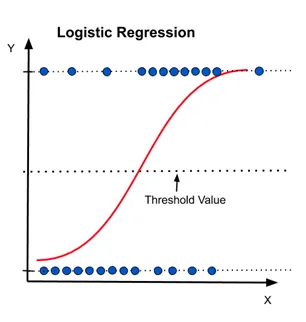

### Problem statement

The aim is to make predictions on the survival outcome of passengers on the Titanic. This is a binary classification, so logistic regression can be used to build the model.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading in the data
titanic = pd.read_csv('titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# checking for misisng values
titanic.isnull().sum()


# imputation of missing values
# median of the age column
print('Median of Age column: %.2f' % (titanic['Age'].median(skipna= True)))

# Percentage of missing records in the cabin column
print('Percent of missing records in the Cabin column: %.2f%%' %((titanic['Cabin'].isnull().sum()/titanic.shape[0])*100))

# Most common boarding port
print('Most common boarding port: %s' % titanic['Embarked'].value_counts().idxmax())

Median of Age column: 28.00
Percent of missing records in the Cabin column: 77.10%
Most common boarding port: S


In [11]:
# Filling age column by median
titanic['Age'].fillna(titanic['Age'].median(skipna= True),
                      inplace=True)

# filling embarked column by most common port
titanic['Embarked'].fillna(titanic['Embarked'].value_counts().idxmax(),
                           inplace=True)

# dropping the cabin columns
titanic.drop('Cabin', axis=1, inplace=True)